<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/Autoregressive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

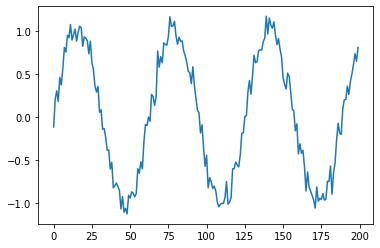

In [48]:
# make the original data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)*0.1 # + шум

# plot it
plt.plot(series)
plt.show()

In [49]:
X

array([[-0.07427541,  0.06788414,  0.21097098, ...,  0.81097027,
         0.60928462,  0.79650917],
       [ 0.06788414,  0.21097098,  0.63164972, ...,  0.60928462,
         0.79650917,  0.68076974],
       [ 0.21097098,  0.63164972,  0.42070758, ...,  0.79650917,
         0.68076974,  0.79203725],
       ...,
       [-0.16849396,  0.00132952,  0.1273085 , ...,  0.40418038,
         0.48411147,  0.62807898],
       [ 0.00132952,  0.1273085 ,  0.17673494, ...,  0.48411147,
         0.62807898,  0.83122268],
       [ 0.1273085 ,  0.17673494,  0.22272752, ...,  0.62807898,
         0.83122268,  0.79611495]])

In [50]:
# build the dataset
# let's see if we can use T past values to predict the next value
# x_t = w_0 + w_1 * x_t-1 + w_2 * x_t-2 + w_3 * x_t-3
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)  

X.shape (190, 10) Y.shape (190,)


In [51]:
#try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model (i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr=0.1)
)

#train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 23ms/step - loss: 0.2700 - val_loss: 0.2125
Epoch 2/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1347 - val_loss: 0.0721
Epoch 3/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0931 - val_loss: 0.0512
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0471 - val_loss: 0.1031
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0706 - val_loss: 0.0455
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0411 - val_loss: 0.0791
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0473 - val_loss: 0.0450
Epoch 8/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0354 - val_loss: 0.0498
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0321 - val_loss: 0.0373
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0322 - val_loss: 0.0380
Epoch 11/80
3/3 [============

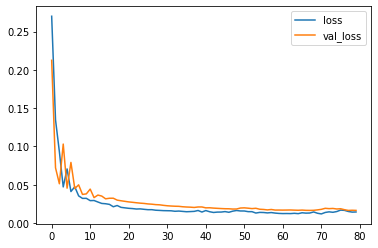

In [52]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_prediction = []

# index of first validation input
i = -N//2

while len(validation_prediction) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i +=1

    # update the predictions list
    validation_prediction.append(p)
    

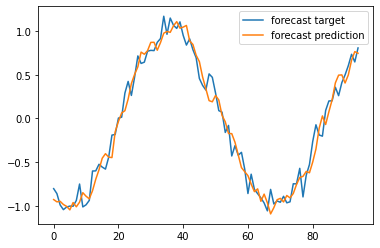

In [54]:
plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_prediction, label = 'forecast prediction')
plt.legend()

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)

    # make the new input ()
    # Roll array elements along a given axis. Elements that roll beyond the last position are re-introduced at the first.
    last_x = np.roll(last_x, -1)
    last_x[-1] = p


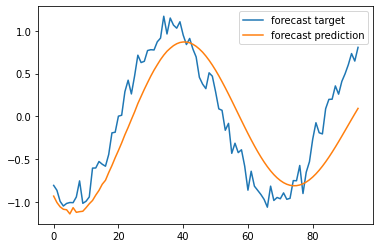

In [56]:
plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()